This notebook extracts the location of 512x512 crops of main images and saves it in a DataFrame.
The extraction is based on the standar deviation of pixels.
..
it takes about 9 hours to run.


In [2]:
import openslide
import pandas as pd
import numpy as np
from tqdm import tqdm
import os
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import ast
import tensorflow as tf
from tensorflow import keras

In [3]:
df = pd.read_csv('../input/mayo-clinic-strip-ai/train.csv')

In [4]:
def get_patch2(os_obj, tl_pixel, patch_shape):
    return np.array(os_obj.read_region(tl_pixel, 0, patch_shape).convert("RGB"))

final_data = pd.DataFrame()
ids = []
for n in tqdm(range(df.shape[0])):
    img_path = "../input/mayo-clinic-strip-ai/train/"+df.iloc[n]['image_id']+".tif"
    label = df.iloc[n]['label']
    i_id  = df.iloc[n]['image_id']
    ids.append(i_id)
    img  = openslide.open_slide(img_path)
    series = pd.Series()
    n = 0
    for i in range(img.dimensions[0]//25,img.dimensions[0]-img.dimensions[0]//25,2048):
        for j in range(img.dimensions[0]//25,img.dimensions[0]-img.dimensions[0]//25,2048):
            if n >= 3:
                break
            im = get_patch2(img , (i,j), (2048,2048) )
            if im.std()>30.0:
                n = n + 1
                s = pd.Series(data = [(i,j)])
                series = series.append(s,ignore_index=True)
                series = series.reset_index()
                series = series.drop("index",axis=1)
    final_data = pd.concat([final_data , series],axis=1)
    final_data.columns = ids


  0%|          | 0/754 [00:00<?, ?it/s]/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if sys.path[0] == "":
100%|██████████| 754/754 [2:21:45<00:00, 11.28s/it]  


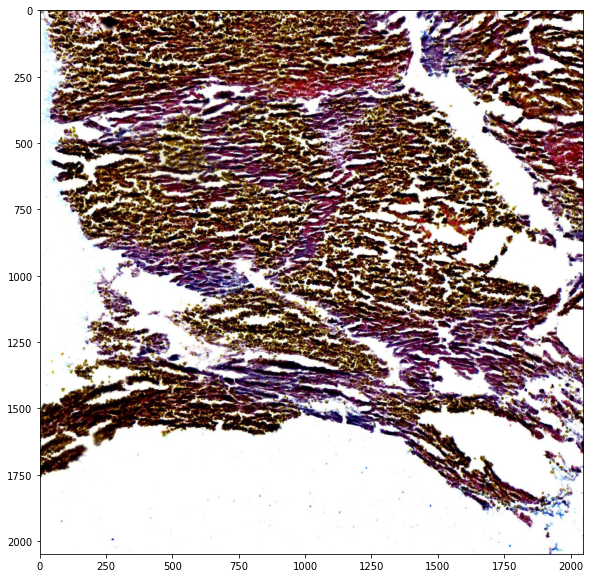

In [22]:
plt.figure(figsize = (10,10))
plt.imshow(get_patch2(openslide.open_slide("../input/mayo-clinic-strip-ai/train/006388_0.tif"), (3408, 3408), (2048, 2048)))


In [21]:
final_data.T.to_csv('./navigation_v3.csv')